In [4]:
# Zachary Katz
# zachary_katz@mines.edu
# 5 May 2025

"""
Example notebook to load and plot several Whillans events.

Revision History
v0.1 - 5 May 2025
    Hard-coded location as event files private on Zenodo
"""

# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set path to event files
evts_path = "../data/evt"

In [5]:
def plot_event(event: pd.DataFrame, var="x") -> None:
    """
    Plot

    Parameters
    ----------
    event : pd.DataFrame
        Event to plot
    var : str
        Variable to plot.
        Valid options: 'x', 'y', 'z'
    """

    fig, ax1 = plt.subplots(figsize=(8, 6))
    times = pd.to_datetime(event["time"])
    sta_name_len = 4  # Length of station name for title
    plot_cols = [col for col in event if str(col).endswith(var)]

    first = True
    # Loop through stations for plotting
    for plot_col in plot_cols:
        demeaned_to_0 = (event[plot_col] - np.mean(event[plot_col])) - (
            event[plot_col][event.index[0]] - np.mean(event[plot_col])
        )
        if not np.isnan(event[plot_col][event.index[0]]):
            if first:
                ax2_dummy = demeaned_to_0
                first = False
            ax1.plot(times, demeaned_to_0, label=str(plot_col)[:sta_name_len])
    ax1.set_ylabel(f"{var.upper()} Displacement [meters]")
    ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    ax1.legend()
    ax1.set_xlim(times.iloc[0], times.iloc[-1])

    # Setup dates using second axis
    ax2 = ax1.twiny()
    ax2.xaxis.set_major_formatter(mdates.DateFormatter("%d %b %Y"))
    fig.subplots_adjust(bottom=0.10)
    ax2.set_frame_on(True)
    ax2.patch.set_visible(False)
    ax2.xaxis.set_ticks_position("bottom")
    ax2.xaxis.set_label_position("bottom")
    ax2.spines["bottom"].set_position(("outward", 20))
    ax2.set_xlabel("DateTime")

    # Need to plot something on ax2 to get the correct dates
    ax2.plot(times, ax2_dummy)
    for label in ax2.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)

Loading 2010-01-22_07-56-45.evt
Loading 2010-01-24_08-43-15.evt


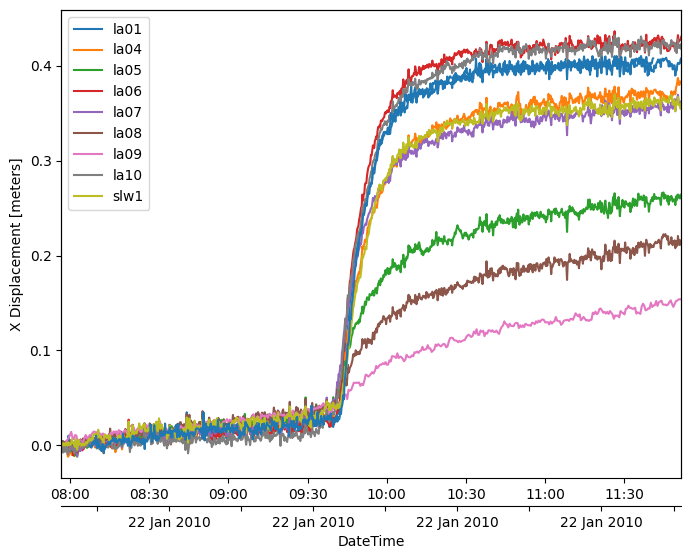

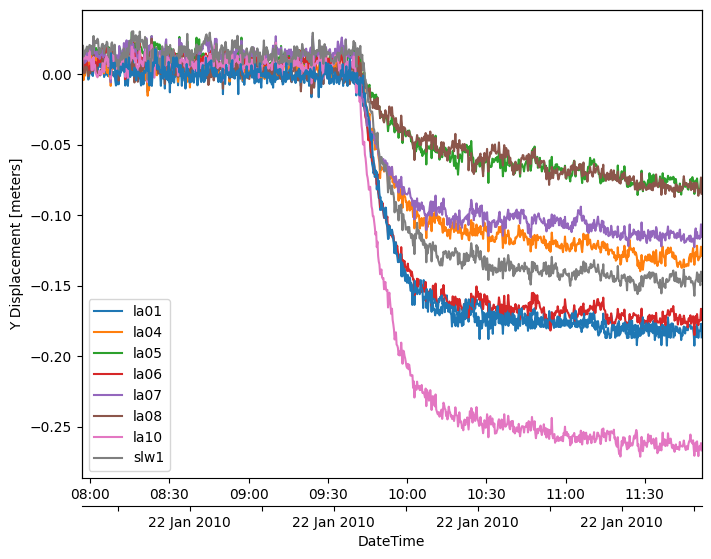

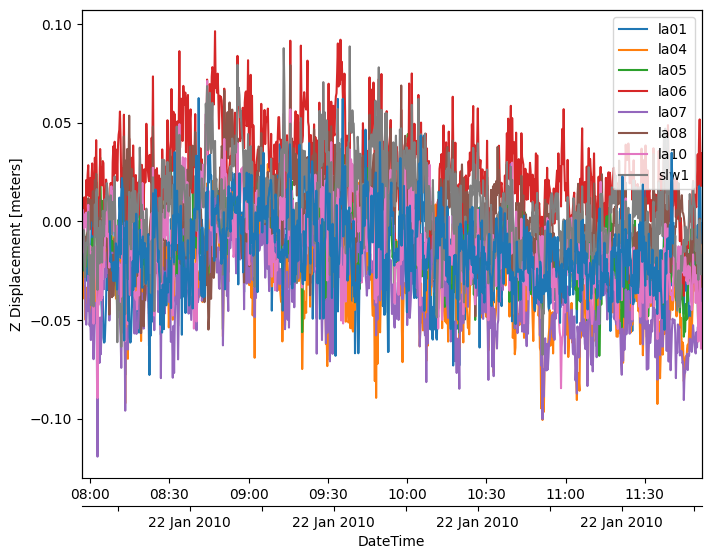

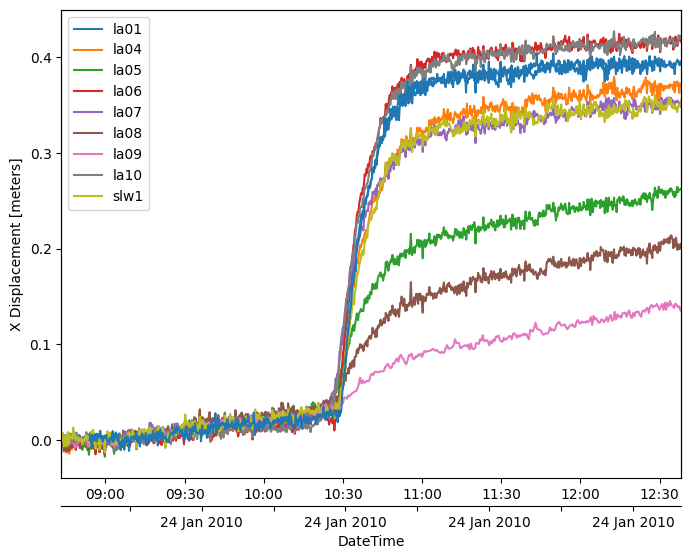

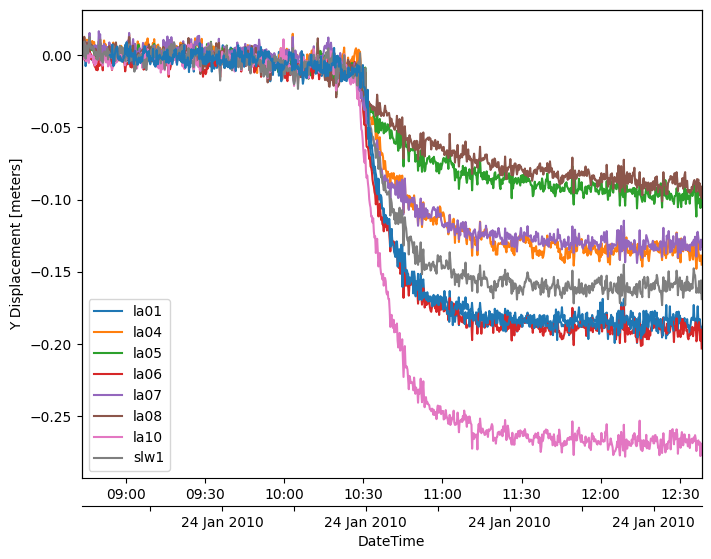

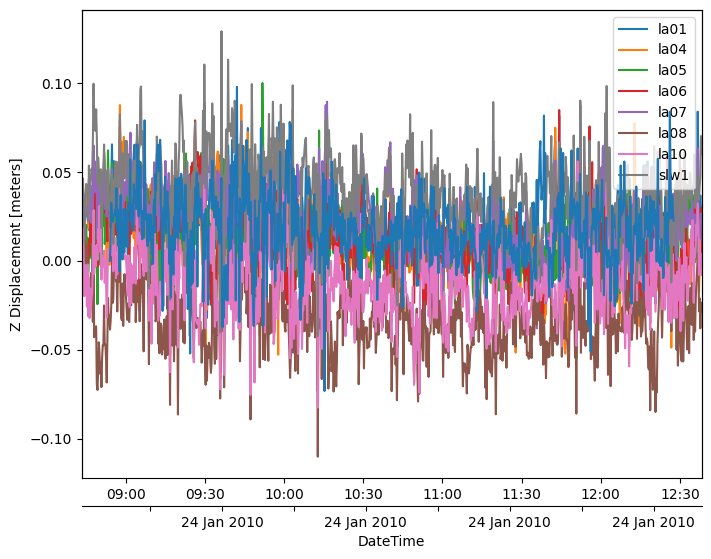

In [6]:
# Load and plot events
start = 0
end = 2

for evt_path in os.listdir(evts_path)[start:end]:
    print(f"Loading {evt_path}")
    event = pd.read_csv(os.path.join(evts_path, evt_path), sep="\t")
    plot_event(event, var="x")
    plot_event(event, var="y")
    plot_event(event, var="z")